In [ ]:
!unzip  /content/a.zip -d /content/

Archive:  /content/a.zip
  inflating: /content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv  
  inflating: /content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv  
  inflating: /content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv  
  inflating: /content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv  
  inflating: /content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv  
  inflating: /content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv  
  inflating: /content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv  
  inflating: /content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv  
  inflating: /content/mturkfitbit_ex

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
heartrate=pd.read_csv("/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

In [ ]:
heartrate.columns

Index(['Id', 'Time', 'Value'], dtype='object')

In [ ]:
dailyactivity=pd.read_csv("/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")


In [ ]:
dailyactivity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [ ]:
dailysleep=pd.read_csv("/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

In [ ]:
dailysleep.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')

In [ ]:
import pandas as pd

# Load datasets
heartrate = pd.read_csv("/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")  # Time-based
dailyactivity = pd.read_csv("/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")  # Activity data
dailysleep = pd.read_csv("/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")  # Sleep data

# Convert timestamps to datetime format with error handling
heartrate['Time'] = pd.to_datetime(heartrate['Time'], errors='coerce')
dailyactivity['ActivityDate'] = pd.to_datetime(dailyactivity['ActivityDate'], errors='coerce')
dailysleep['SleepDay'] = pd.to_datetime(dailysleep['SleepDay'], errors='coerce')

# Aggregate heartrate to daily mean per user
heartrate_daily = heartrate.groupby(['Id', heartrate['Time'].dt.date])['Value'].mean().reset_index()
heartrate_daily.rename(columns={'Value': 'AvgHeartRate', 'Time': 'Date'}, inplace=True)

# Ensure 'Date' column is in datetime format
heartrate_daily['Date'] = pd.to_datetime(heartrate_daily['Date'], errors='coerce')

# Rename date columns for uniformity
dailyactivity.rename(columns={'ActivityDate': 'Date'}, inplace=True)
dailysleep.rename(columns={'SleepDay': 'Date'}, inplace=True)

# Merge all datasets on Id and Date
merged_df = dailyactivity.merge(dailysleep, on=['Id', 'Date'], how='left')\
                         .merge(heartrate_daily, on=['Id', 'Date'], how='left')

# Save merged dataset
merged_df.to_csv("merged_fitbit_data.csv", index=False)

print("✅ Merging complete. Final dataset saved as 'merged_fitbit_data.csv'.")
print(merged_df.head())  # Display sample rows


<ipython-input-26-e4f93d756f9d>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dailysleep['SleepDay'] = pd.to_datetime(dailysleep['SleepDay'], errors='coerce')


✅ Merging complete. Final dataset saved as 'merged_fitbit_data.csv'.
           Id       Date  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366 2016-04-12       13162           8.50             8.50   
1  1503960366 2016-04-13       10735           6.97             6.97   
2  1503960366 2016-04-14       10460           6.74             6.74   
3  1503960366 2016-04-15        9762           6.28             6.28   
4  1503960366 2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryAc

In [ ]:
import pandas as pd

# Load merged dataset
merged_df = pd.read_csv("merged_fitbit_data.csv")

# Convert 'Date' column to datetime format (if not already)
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Fill missing AvgHeartRate with the user's average heart rate
merged_df['AvgHeartRate'] = merged_df.groupby('Id')['AvgHeartRate'].transform(lambda x: x.fillna(x.mean()))

# If some users still have NaN heart rate, fill with global median
merged_df['AvgHeartRate'].fillna(merged_df['AvgHeartRate'].median(), inplace=True)

# Fill missing sleep data with the median of that column
sleep_cols = ['TotalMinutesAsleep', 'TotalTimeInBed']
for col in sleep_cols:
    merged_df[col].fillna(merged_df[col].median(), inplace=True)

# Drop rows with too many missing values (threshold: at least 5 non-null values)
merged_df.dropna(thresh=5, inplace=True)

# Forward-fill missing values for each user
merged_df.sort_values(['Id', 'Date'], inplace=True)
merged_df.fillna(method='ffill', inplace=True)

# Save the cleaned dataset
merged_df.to_csv("cleaned_fitbit_data.csv", index=False)

print("✅ Preprocessing complete. Cleaned dataset saved as 'cleaned_fitbit_data.csv'.")
print(merged_df.isnull().sum())  # Check if any missing values remain


✅ Preprocessing complete. Cleaned dataset saved as 'cleaned_fitbit_data.csv'.
Id                          0
Date                        0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
AvgHeartRate                0
dtype: int64


<ipython-input-28-bab85dd94878>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['AvgHeartRate'].fillna(merged_df['AvgHeartRate'].median(), inplace=True)
<ipython-input-28-bab85dd94878>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [ ]:
df=pd.read_excel("/content/processed_dataset.xlsx")

In [ ]:
#preprocessing secondary dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Load Fitbit dataset (merged dataset from previous steps)
fitbit_df = pd.read_csv("merged_fitbit_data.csv")

# Load Secondary Dataset
secondary_df = pd.read_excel("/content/processed_dataset.xlsx")  # Replace with actual filename

# Ignore incorrect 'activity score' column
secondary_df = secondary_df.drop(columns=['activity score'], errors='ignore')

# Convert Date to datetime for Fitbit data
fitbit_df['Date'] = pd.to_datetime(fitbit_df['Date'])

# Fill missing values with median (basic preprocessing)
imputer = SimpleImputer(strategy="median")
fitbit_df.iloc[:, 2:] = imputer.fit_transform(fitbit_df.iloc[:, 2:])  # Skip Id & Date

secondary_df.iloc[:, 1:] = imputer.fit_transform(secondary_df.iloc[:, 1:])


In [ ]:
#Train Model on Secondary Dataset

# Define Features (X) and Labels (Y)
X = secondary_df[['sleep hours', 'level of bp', 'heart rate']]
Y = secondary_df[['stress', 'anxiety', 'depression', 'hypertension', 'non-wellbeing']]

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Random Forest Model for each label separately
models = {}
for label in Y.columns:
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, Y_train[label])
    models[label] = rf  # Save trained model

print("✅ Model training complete!")


✅ Model training complete!


In [ ]:
# #creating labelled fitbit data

# # Select only required features in the correct order
# fitbit_features = fitbit_df[['TotalMinutesAsleep', 'AvgHeartRate', 'TotalSteps']].copy()

# # Rename Fitbit columns to match the training dataset's feature names
# fitbit_features.rename(columns={
#     'TotalMinutesAsleep': 'sleep hours',
#     'AvgHeartRate': 'heart rate',
#     'TotalSteps': 'level of bp'  # Approximation
# }, inplace=True)

# # Ensure column order is identical to training features
# fitbit_features = fitbit_features[['sleep hours', 'level of bp', 'heart rate']]

# # Predict Labels using trained models
# predictions = {}
# for label, model in models.items():
#     predictions[label] = model.predict(fitbit_features)

# # Add Predictions to Fitbit Data
# for label in predictions:
#     fitbit_df[label] = predictions[label]

# # Save Final Fitbit Dataset with Labels
# fitbit_df.to_csv("fitbit_labeled.csv", index=False)
# print("✅ Predictions added! Final dataset saved as 'fitbit_labeled.csv'.")


✅ Predictions added! Final dataset saved as 'fitbit_labeled.csv'.


In [ ]:
# Convert sleep minutes to hours
fitbit_df['TotalMinutesAsleep'] = fitbit_df['TotalMinutesAsleep'] / 60  # Convert minutes to hours

# Select only required features in the correct order
fitbit_features = fitbit_df[['TotalMinutesAsleep', 'AvgHeartRate', 'TotalSteps']].copy()

# Rename Fitbit columns to match the secondary dataset's feature names
fitbit_features.rename(columns={
    'TotalMinutesAsleep': 'sleep hours',  # Now in hours ✅
    'AvgHeartRate': 'heart rate',
    'TotalSteps': 'level of bp'  # Approximate mapping
}, inplace=True)

# Ensure column order is identical to training features
fitbit_features = fitbit_features[['sleep hours', 'level of bp', 'heart rate']]

# Predict Labels using trained models
predictions = {}
for label, model in models.items():
    predictions[label] = model.predict(fitbit_features)

# Add Predictions to Fitbit Data
for label in predictions:
    fitbit_df[label] = predictions[label]

# Save Final Fitbit Dataset with Labels
fitbit_df.to_csv("fitbit_labeled.csv", index=False)
print("✅ Predictions added! Final dataset saved as 'fitbit_labeled.csv'.")


✅ Predictions added! Final dataset saved as 'fitbit_labeled.csv'.


In [ ]:
'''

Step	Description
Step 1	Merged dailyActivity, sleepDay, and heartrate_seconds into fitbit_df
Step 2	Converted sleep minutes to hours, extracted heart rate & steps as features
Step 3	Trained models on the secondary dataset and used them to predict labels for Fitbit data
'''

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,AvgHeartRate,stress,anxiety,depression,hypertension,non-wellbeing
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,...,1985,1.0,5.450000,346.0,77.439143,2,4,2,1,1
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,...,1797,2.0,6.400000,407.0,77.439143,2,2,1,1,1
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,...,1776,1.0,7.216667,463.0,77.439143,0,2,0,1,1
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,...,1745,1.0,6.866667,442.0,77.439143,1,1,0,1,1
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,...,1863,2.0,5.666667,367.0,77.439143,2,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,2847,1.0,7.216667,463.0,72.550523,0,2,0,1,1
939,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,3710,1.0,7.216667,463.0,89.615738,0,2,0,1,1
940,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,2832,1.0,7.216667,463.0,71.544377,0,2,0,1,1
941,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,3832,1.0,7.216667,463.0,89.149122,0,2,0,1,1


In [ ]:
!pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
fitbit_df.columns

Index(['Id', 'Date', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed',
       'AvgHeartRate', 'stress', 'anxiety', 'depression', 'hypertension',
       'non-wellbeing'],
      dtype='object')

In [ ]:
df=pd.read_csv("/content/cleaned_consistent_dataset.csv")

In [ ]:
df.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,AvgHeartRate,stress,anxiety,depression,hypertension,non-wellbeing
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,1985,1,5.450000,346,77.439143,2,4,2,1,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,1797,2,6.400000,407,77.439143,2,2,1,1,1
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,1776,1,7.216667,463,77.439143,0,2,0,1,1
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,1745,1,6.866667,442,77.439143,1,1,0,1,1
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,1863,2,5.666667,367,77.439143,2,4,2,1,1


In [ ]:
import pandas as pd

# Combine first and last 5 rows
subset_rows = pd.concat([df.head(), df.tail()])

# Get first 5 and last 5 columns
first_cols = subset_rows.iloc[:, :5]
last_cols = subset_rows.iloc[:, -5:]

# Concatenate them side-by-side
subset_cols = pd.concat([first_cols, last_cols], axis=1)

# Show everything nicely
print(subset_cols)



             Id        Date  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366  2016-04-12       13162       8.500000         8.500000   
1    1503960366  2016-04-13       10735       6.970000         6.970000   
2    1503960366  2016-04-14       10460       6.740000         6.740000   
3    1503960366  2016-04-15        9762       6.280000         6.280000   
4    1503960366  2016-04-16       12669       8.160000         8.160000   
938  8877689391  2016-05-08       10686       8.110000         8.110000   
939  8877689391  2016-05-09       20226      18.250000        18.250000   
940  8877689391  2016-05-10       10733       8.150000         8.150000   
941  8877689391  2016-05-11       21420      19.559999        19.559999   
942  8877689391  2016-05-12        8064       6.120000         6.120000   

     stress  anxiety  depression  hypertension  non-wellbeing  
0         2        4           2             1              1  
1         2        2           1             1

In [ ]:
from tabulate import tabulate
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
subset_rows = pd.concat([df.head(), df.tail()])

# Select first 4 and last 4 columns
n_cols = 4
first_cols = subset_rows.iloc[:, :n_cols]
last_cols = subset_rows.iloc[:, -n_cols:]

# Create a single-column DataFrame of '...' with same number of rows
ellipsis_col = pd.DataFrame({'...': ['...'] * len(subset_rows)})

# Combine all parts
compact_view = pd.concat([first_cols, ellipsis_col, last_cols], axis=1)

# Pretty print
print(tabulate(compact_view, headers='keys', tablefmt='fancy_grid', showindex=False))


╒═══════════════╤════════════╤══════════════╤═════════════════╤═══════╤═══════════╤══════════════╤════════════════╤═════════════════╕
│            Id │ Date       │   TotalSteps │   TotalDistance │ ...   │   anxiety │   depression │   hypertension │   non-wellbeing │
╞═══════════════╪════════════╪══════════════╪═════════════════╪═══════╪═══════════╪══════════════╪════════════════╪═════════════════╡
│   1.50396e+09 │ 2016-04-12 │        13162 │            8.5  │ ...   │         4 │            2 │              1 │               1 │
├───────────────┼────────────┼──────────────┼─────────────────┼───────┼───────────┼──────────────┼────────────────┼─────────────────┤
│   1.50396e+09 │ 2016-04-13 │        10735 │            6.97 │ ...   │         2 │            1 │              1 │               1 │
├───────────────┼────────────┼──────────────┼─────────────────┼───────┼───────────┼──────────────┼────────────────┼─────────────────┤
│   1.50396e+09 │ 2016-04-14 │        10460 │            6.74 

In [ ]:
%%html
<style>
.output pre {font-size: 11px;}
</style>


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("fitbit_labeled_data.csv")

# List of output columns
output_columns = ['stress', 'anxiety', 'depression', 'hypertension', 'non-wellbeing']

# Print unique values for each
for col in output_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")


Unique values in 'stress': [2 0 1]
Unique values in 'anxiety': [4 2 1 0]
Unique values in 'depression': [2 1 0 4 3]
Unique values in 'hypertension': [1 0]
Unique values in 'non-wellbeing': [1 0]


In [ ]:
#forecastefinal
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("/content/cleaned_consistent_dataset.csv")  # Replace with your actual file path

# Drop non-feature columns
features = df.drop(columns=['Id', 'Date', 'stress', 'anxiety', 'depression', 'hypertension', 'non-wellbeing'])

# Labels to predict
labels = ['stress', 'anxiety', 'depression', 'hypertension', 'non-wellbeing']

# Dictionary to store trained models
models = {}

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Train a model for each label
for label in labels:
    y = df[label]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Save the trained model
    models[label] = rf
    print(f"Trained model for: {label}")


Trained model for: stress
Trained model for: anxiety
Trained model for: depression
Trained model for: hypertension
Trained model for: non-wellbeing


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib  # For saving models

# Load your dataset
df = pd.read_csv("/content/cleaned_consistent_dataset.csv")  # Replace with your actual file path

# Drop non-feature columns
features = df.drop(columns=['Id', 'Date', 'stress', 'anxiety', 'depression', 'hypertension', 'non-wellbeing'])

# Labels to predict
labels = ['stress', 'anxiety', 'depression', 'hypertension', 'non-wellbeing']

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Save the scaler
joblib.dump(scaler, "scaler.joblib")

# Train a model for each label
for label in labels:
    y = df[label]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Save the model
    model_filename = f"{label}_model.joblib"
    joblib.dump(rf, model_filename)
    print(f"Trained and saved model for: {label} as {model_filename}")


Trained and saved model for: stress as stress_model.joblib
Trained and saved model for: anxiety as anxiety_model.joblib
Trained and saved model for: depression as depression_model.joblib
Trained and saved model for: hypertension as hypertension_model.joblib
Trained and saved model for: non-wellbeing as non-wellbeing_model.joblib


In [ ]:
#predict for a sample

KeyError: "['Id', 'Date'] not found in axis"

In [ ]:
import pandas as pd
import joblib

# Load the pre-fitted scaler
scaler = joblib.load("scaler.joblib")

# Labels to predict (same as before)
labels = ['stress', 'anxiety', 'depression', 'hypertension', 'non-wellbeing']

# Load each saved model into a dictionary
models = {}
for label in labels:
    model_path = f"{label}_model.joblib"
    models[label] = joblib.load(model_path)

# Sample data for prediction
high_anxiety_depression_sample = {
    'TotalSteps': 12000,
    'TotalDistance': 9.0,
    'TrackerDistance': 8.5,
    'LoggedActivitiesDistance': 1.0,
    'VeryActiveDistance': 1.5,
    'ModeratelyActiveDistance': 3.5,
    'LightActiveDistance': 4.0,
    'SedentaryActiveDistance': 0.0,
    'VeryActiveMinutes': 30,
    'FairlyActiveMinutes': 50,
    'LightlyActiveMinutes': 120,
    'SedentaryMinutes': 300,
    'Calories': 2200,
    'TotalSleepRecords': 1,
    'TotalMinutesAsleep': 2,
    'TotalTimeInBed': 510,
    'AvgHeartRate': 70
}

# Convert sample data to a DataFrame
sample_df = pd.DataFrame([high_anxiety_depression_sample])

# Define the exact feature columns used during training
feature_columns = [
    'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance',
    'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
    'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
    'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'TotalSleepRecords',
    'TotalMinutesAsleep', 'TotalTimeInBed', 'AvgHeartRate'
]

# Extract and scale features
sample_features = sample_df[feature_columns]
scaled_features = scaler.transform(sample_features)

# Make predictions with loaded models
print("\nPredictions for the high anxiety/depression sample:")
for label in labels:
    prediction = models[label].predict(scaled_features)[0]
    print(f"{label}: {prediction}")



Predictions for the high anxiety/depression sample:
stress: 2
anxiety: 2
depression: 0
hypertension: 1
non-wellbeing: 1


Forecasting stress for User 1503960366...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


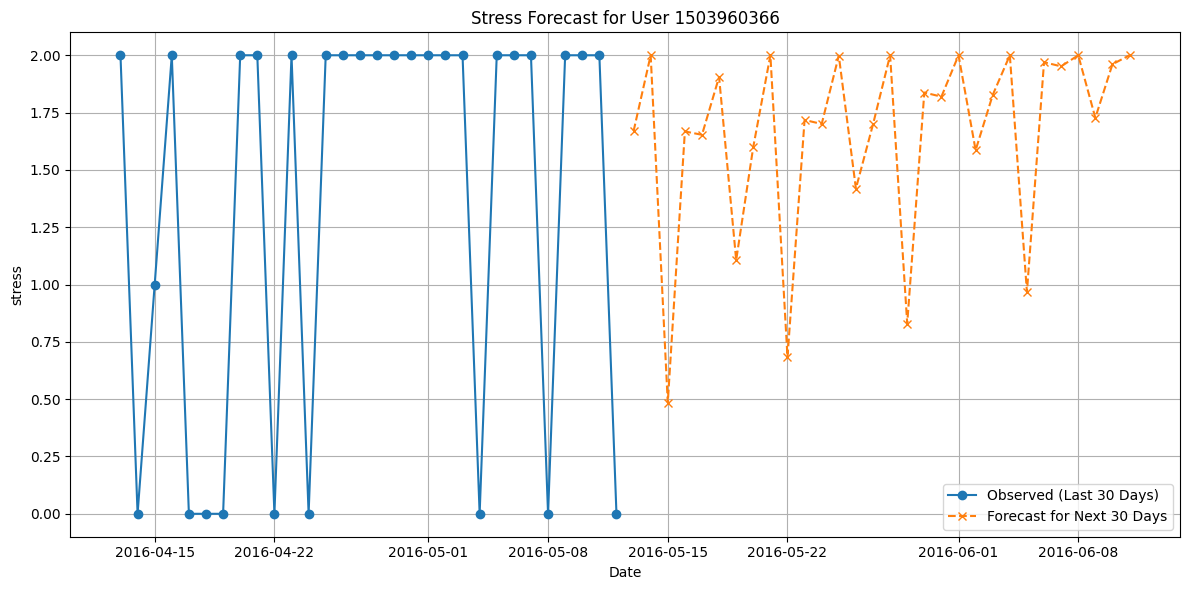

Forecast for stress for the next 30 days:
                 Date  Forecast
2016-05-13 2016-05-13  1.668813
2016-05-14 2016-05-14  2.000000
2016-05-15 2016-05-15  0.485401
2016-05-16 2016-05-16  1.667746
2016-05-17 2016-05-17  1.653022
2016-05-18 2016-05-18  1.905188
2016-05-19 2016-05-19  1.106605
2016-05-20 2016-05-20  1.600490
2016-05-21 2016-05-21  2.000000
2016-05-22 2016-05-22  0.683431
2016-05-23 2016-05-23  1.717783
2016-05-24 2016-05-24  1.700291
2016-05-25 2016-05-25  1.998407
2016-05-26 2016-05-26  1.418711
2016-05-27 2016-05-27  1.698534
2016-05-28 2016-05-28  2.000000
2016-05-29 2016-05-29  0.830002
2016-05-30 2016-05-30  1.837391
2016-05-31 2016-05-31  1.819395
2016-06-01 2016-06-01  2.000000
2016-06-02 2016-06-02  1.586066
2016-06-03 2016-06-03  1.826889
2016-06-04 2016-06-04  2.000000
2016-06-05 2016-06-05  0.967198
2016-06-06 2016-06-06  1.969675
2016-06-07 2016-06-07  1.951587
2016-06-08 2016-06-08  2.000000
2016-06-09 2016-06-09  1.727049
2016-06-10 2016-06-10  1.96076

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


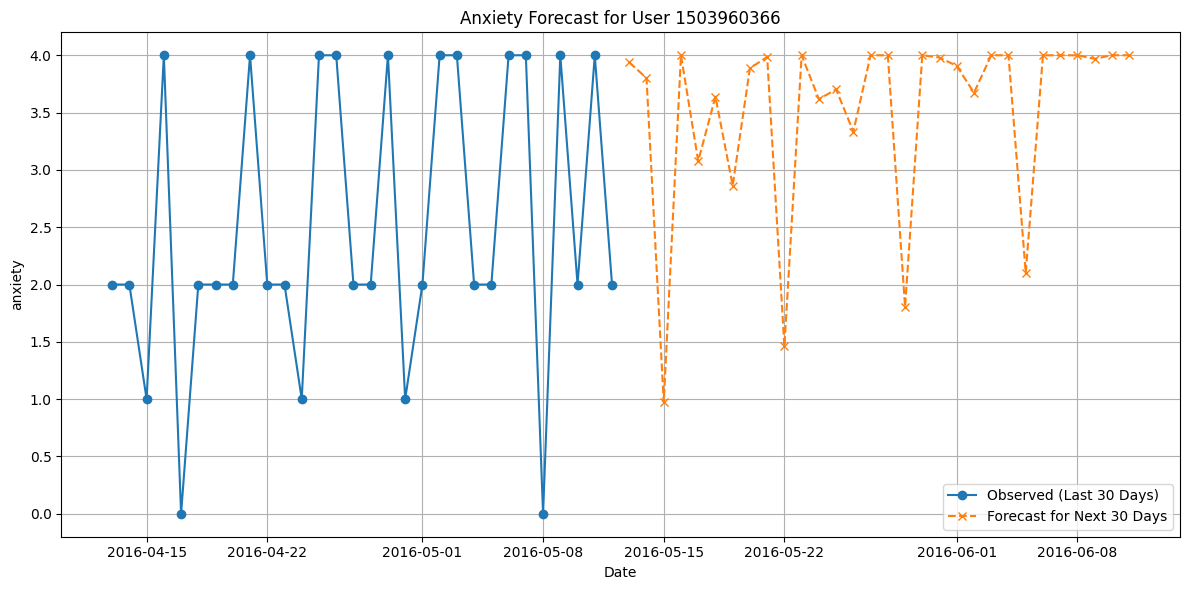

Forecast for anxiety for the next 30 days:
                 Date  Forecast
2016-05-13 2016-05-13  3.938362
2016-05-14 2016-05-14  3.801018
2016-05-15 2016-05-15  0.974028
2016-05-16 2016-05-16  4.000000
2016-05-17 2016-05-17  3.077577
2016-05-18 2016-05-18  3.638887
2016-05-19 2016-05-19  2.863186
2016-05-20 2016-05-20  3.886912
2016-05-21 2016-05-21  3.985152
2016-05-22 2016-05-22  1.460121
2016-05-23 2016-05-23  4.000000
2016-05-24 2016-05-24  3.617222
2016-05-25 2016-05-25  3.702391
2016-05-26 2016-05-26  3.333355
2016-05-27 2016-05-27  4.000000
2016-05-28 2016-05-28  4.000000
2016-05-29 2016-05-29  1.804982
2016-05-30 2016-05-30  4.000000
2016-05-31 2016-05-31  3.979902
2016-06-01 2016-06-01  3.906577
2016-06-02 2016-06-02  3.672909
2016-06-03 2016-06-03  4.000000
2016-06-04 2016-06-04  4.000000
2016-06-05 2016-06-05  2.102824
2016-06-06 2016-06-06  4.000000
2016-06-07 2016-06-07  4.000000
2016-06-08 2016-06-08  4.000000
2016-06-09 2016-06-09  3.968985
2016-06-10 2016-06-10  4.0000

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


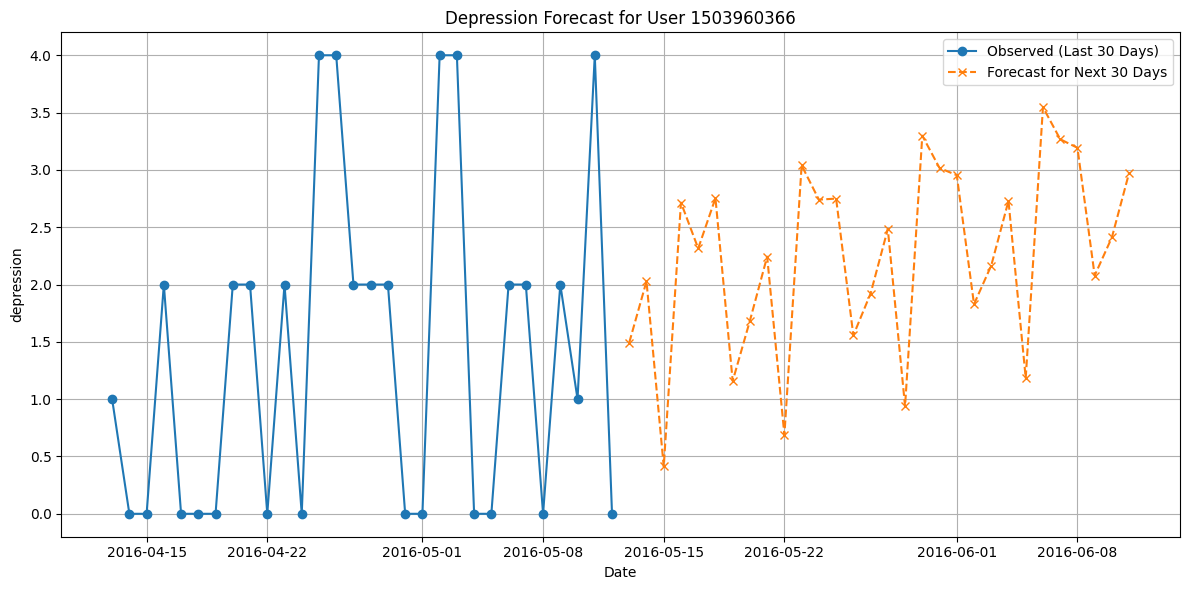

Forecast for depression for the next 30 days:
                 Date  Forecast
2016-05-13 2016-05-13  1.493739
2016-05-14 2016-05-14  2.028549
2016-05-15 2016-05-15  0.412672
2016-05-16 2016-05-16  2.714789
2016-05-17 2016-05-17  2.315224
2016-05-18 2016-05-18  2.753610
2016-05-19 2016-05-19  1.157809
2016-05-20 2016-05-20  1.684632
2016-05-21 2016-05-21  2.243417
2016-05-22 2016-05-22  0.687023
2016-05-23 2016-05-23  3.039402
2016-05-24 2016-05-24  2.740426
2016-05-25 2016-05-25  2.749557
2016-05-26 2016-05-26  1.556631
2016-05-27 2016-05-27  1.921427
2016-05-28 2016-05-28  2.484228
2016-05-29 2016-05-29  0.937803
2016-05-30 2016-05-30  3.298604
2016-05-31 2016-05-31  3.016484
2016-06-01 2016-06-01  2.953684
2016-06-02 2016-06-02  1.828268
2016-06-03 2016-06-03  2.165913
2016-06-04 2016-06-04  2.729388
2016-06-05 2016-06-05  1.184632
2016-06-06 2016-06-06  3.546845
2016-06-07 2016-06-07  3.267549
2016-06-08 2016-06-08  3.192696
2016-06-09 2016-06-09  2.078593
2016-06-10 2016-06-10  2.4

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


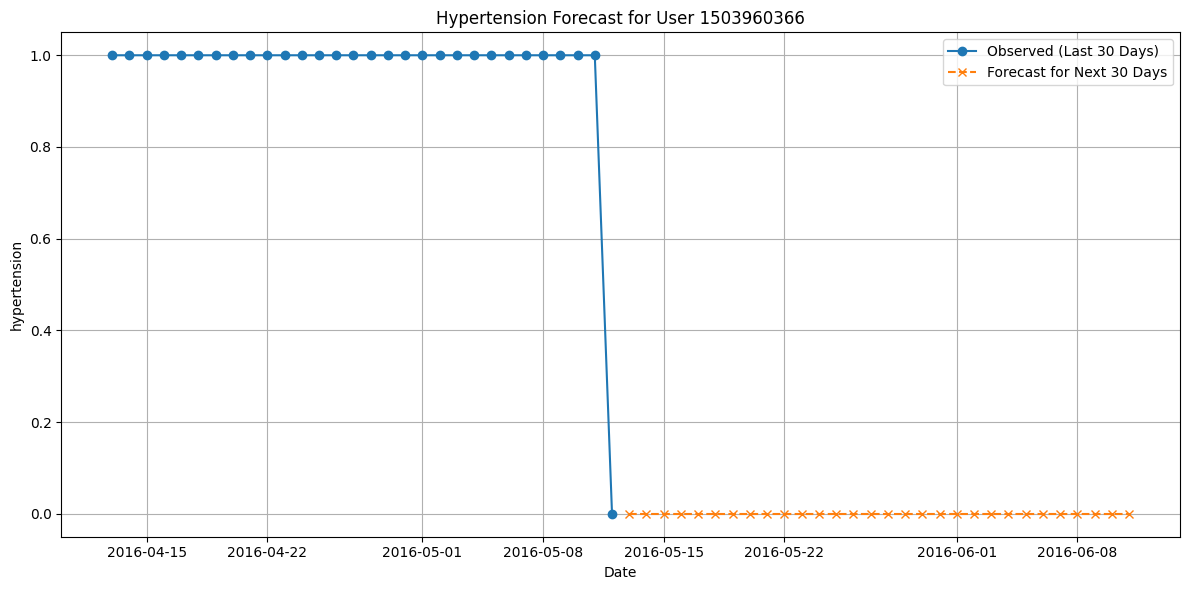

Forecast for hypertension for the next 30 days:
                 Date      Forecast
2016-05-13 2016-05-13  2.207028e-09
2016-05-14 2016-05-14  2.207028e-09
2016-05-15 2016-05-15  2.207028e-09
2016-05-16 2016-05-16  2.207028e-09
2016-05-17 2016-05-17  2.207028e-09
2016-05-18 2016-05-18  6.185663e-10
2016-05-19 2016-05-19  0.000000e+00
2016-05-20 2016-05-20  0.000000e+00
2016-05-21 2016-05-21  0.000000e+00
2016-05-22 2016-05-22  0.000000e+00
2016-05-23 2016-05-23  0.000000e+00
2016-05-24 2016-05-24  0.000000e+00
2016-05-25 2016-05-25  0.000000e+00
2016-05-26 2016-05-26  0.000000e+00
2016-05-27 2016-05-27  0.000000e+00
2016-05-28 2016-05-28  0.000000e+00
2016-05-29 2016-05-29  0.000000e+00
2016-05-30 2016-05-30  0.000000e+00
2016-05-31 2016-05-31  0.000000e+00
2016-06-01 2016-06-01  0.000000e+00
2016-06-02 2016-06-02  0.000000e+00
2016-06-03 2016-06-03  0.000000e+00
2016-06-04 2016-06-04  0.000000e+00
2016-06-05 2016-06-05  0.000000e+00
2016-06-06 2016-06-06  0.000000e+00
2016-06-07 2016-

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


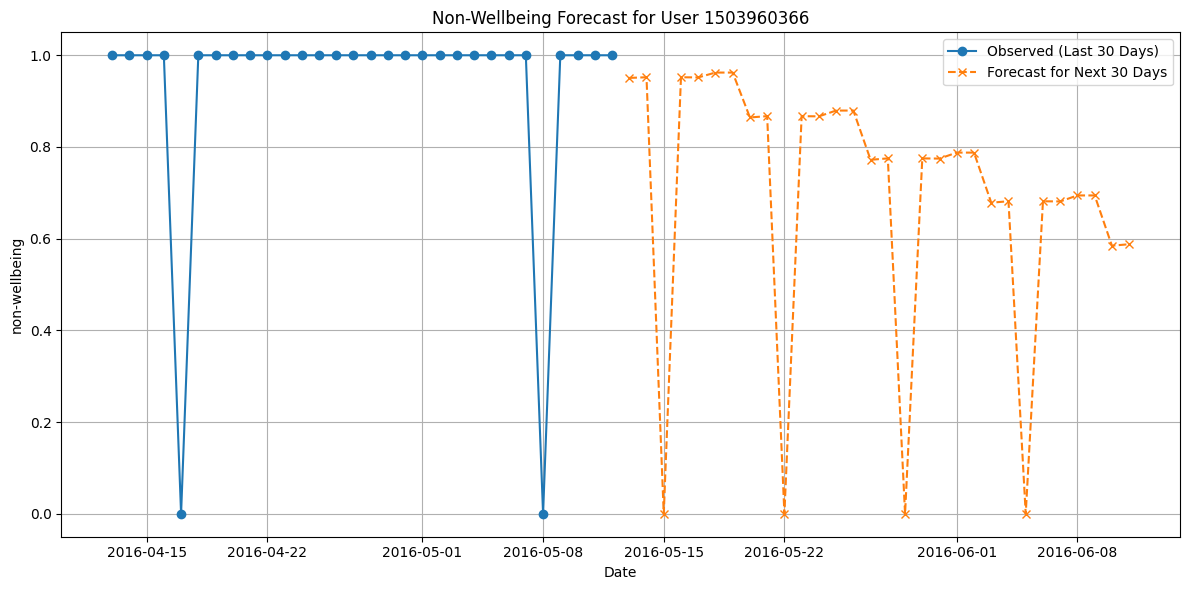

Forecast for non-wellbeing for the next 30 days:
                 Date  Forecast
2016-05-13 2016-05-13  0.950598
2016-05-14 2016-05-14  0.952026
2016-05-15 2016-05-15  0.000000
2016-05-16 2016-05-16  0.951994
2016-05-17 2016-05-17  0.951689
2016-05-18 2016-05-18  0.962257
2016-05-19 2016-05-19  0.962257
2016-05-20 2016-05-20  0.864368
2016-05-21 2016-05-21  0.867197
2016-05-22 2016-05-22  0.000000
2016-05-23 2016-05-23  0.867127
2016-05-24 2016-05-24  0.866762
2016-05-25 2016-05-25  0.879398
2016-05-26 2016-05-26  0.879398
2016-05-27 2016-05-27  0.772022
2016-05-28 2016-05-28  0.775126
2016-05-29 2016-05-29  0.000000
2016-05-30 2016-05-30  0.775049
2016-05-31 2016-05-31  0.774672
2016-06-01 2016-06-01  0.787712
2016-06-02 2016-06-02  0.787712
2016-06-03 2016-06-03  0.678481
2016-06-04 2016-06-04  0.681638
2016-06-05 2016-06-05  0.000000
2016-06-06 2016-06-06  0.681560
2016-06-07 2016-06-07  0.681181
2016-06-08 2016-06-08  0.694300
2016-06-09 2016-06-09  0.694300
2016-06-10 2016-06-10  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 0) Define the valid ranges
valid_ranges = {
    'stress':        (0, 2),
    'anxiety':       (0, 4),
    'depression':    (0, 4),
    'hypertension':  (0, 1),
    'non-wellbeing': (0, 1),
}

# Function to apply SARIMAX for forecasting with clipping for out-of-range values
def sarima_forecast(user_id, target_column, past_data, forecast_days=30, seasonal_period=7):
    """
    user_id: The ID of the user for which prediction is being done
    target_column: The label to forecast (e.g., 'stress', 'anxiety', 'depression')
    past_data: A DataFrame containing past 30 days of data for a user
    forecast_days: Number of days to forecast ahead (default is 30)
    seasonal_period: Period of seasonality (default is 7 for weekly seasonality)
    """
    # Ensure the data is sorted by Date (assuming the index is the Date column)
    past_data = past_data.sort_values('Date')

    # Set the 'Date' column as the index of the DataFrame
    ts = past_data.set_index('Date')[target_column]

    # Convert the index to datetime format (if it's not already)
    ts.index = pd.to_datetime(ts.index)

    # Fit SARIMAX model
    model_sarima = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, seasonal_period))
    results = model_sarima.fit(disp=False)

    # Forecast the next 'forecast_days' days
    forecast = results.forecast(steps=forecast_days)

    # Clip forecast values that are out of range
    lo, hi = valid_ranges[target_column]
    forecast = np.clip(forecast, lo, hi)

    # Generate forecast dates by adding 1 day to the last date in the series
    forecast_dates = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=forecast_days)

    # Plot the historical data and the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(ts.index, ts, label="Observed (Last 30 Days)", marker='o')
    plt.plot(forecast_dates, forecast, label=f"Forecast for Next {forecast_days} Days", linestyle='--', marker='x')
    plt.title(f"{target_column.title()} Forecast for User {user_id}")
    plt.xlabel("Date")
    plt.ylabel(target_column)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return forecast, forecast_dates

# Load your dataset
df = pd.read_csv("/content/cleaned_consistent_dataset.csv")  # Replace with actual path

# Get the first user ID in your dataset
user_id = df['Id'].iloc[0]  # Extracting the first user ID

# Filter the dataset for the first user
past_data = df[df['Id'] == user_id].tail(30)  # Get the last 30 days of data for the first user

# List of labels you want to forecast
labels = ['stress', 'anxiety', 'depression', 'hypertension', 'non-wellbeing']

# Forecast the next 30 days for each label
for label in labels:
    print(f"Forecasting {label} for User {user_id}...")
    forecast, forecast_dates = sarima_forecast(user_id, label, past_data, forecast_days=30)
    # Output the forecasted values for the next 30 days
    print(f"Forecast for {label} for the next 30 days:")
    print(pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast}))
    print("\n")


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 0) Define the valid ranges for clipping
valid_ranges = {
    'stress':        (0, 2),
    'anxiety':       (0, 4),
    'depression':    (0, 4),
    'hypertension':  (0, 1),
    'non-wellbeing': (0, 1),
}

def sarima_forecast(user_id, target_column, past_data, forecast_days=30, seasonal_period=7):
    """
    Fit a SARIMAX model to the last 30 days of `target_column` for one user,
    then forecast `forecast_days` ahead, clipping to valid_ranges.

    Returns
    -------
    forecast : pd.Series
        The clipped forecast values (length = forecast_days).
    forecast_dates : pd.DatetimeIndex
        The dates corresponding to each forecast step.
    """
    # Ensure sorted by Date
    past_data = past_data.sort_values('Date')

    # Build the time series
    ts = past_data.set_index('Date')[target_column].copy()
    ts.index = pd.to_datetime(ts.index)

    # Fit SARIMAX
    model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, seasonal_period))
    res   = model.fit(disp=False)

    # Forecast
    forecast = res.forecast(steps=forecast_days)

    # Clip to valid range
    lo, hi = valid_ranges[target_column]
    forecast = np.clip(forecast, lo, hi)

    # Build forecast dates
    last_date = ts.index[-1]
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                                   periods=forecast_days,
                                   freq='D')

    return forecast, forecast_dates

def main():
    # --- 1) Load your dataset (update path as needed) ---
    df = pd.read_csv("/content/cleaned_consistent_dataset.csv")

    # --- 2) Pick one user (first in this example) ---
    user_id   = df['Id'].iloc[0]
    past_data = df[df['Id'] == user_id].tail(30)  # last 30 days

    # --- 3) Forecast each label and export CSV ---
    labels = ['stress', 'anxiety', 'depression', 'hypertension', 'non-wellbeing']

    for label in labels:
        print(f"Forecasting {label} for User {user_id}...")

        fc_values, fc_dates = sarima_forecast(
            user_id=user_id,
            target_column=label,
            past_data=past_data,
            forecast_days=30,
            seasonal_period=7
        )

        # Build a DataFrame
        df_fc = pd.DataFrame({
            'Date':     fc_dates,
            'Forecast': fc_values.values
        })

        # Write to CSV
        filename = f"{label}_forecast_user{user_id}.csv"
        df_fc.to_csv(filename, index=False)
        print(f"→ Saved forecast to ./{filename}\n")

if __name__ == "__main__":
    main()


Forecasting stress for User 1503960366...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


→ Saved forecast to ./stress_forecast_user1503960366.csv

Forecasting anxiety for User 1503960366...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


→ Saved forecast to ./anxiety_forecast_user1503960366.csv

Forecasting depression for User 1503960366...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


→ Saved forecast to ./depression_forecast_user1503960366.csv

Forecasting hypertension for User 1503960366...
→ Saved forecast to ./hypertension_forecast_user1503960366.csv

Forecasting non-wellbeing for User 1503960366...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


→ Saved forecast to ./non-wellbeing_forecast_user1503960366.csv




📈 Forecasting STRESS for User 1503960366
🧠 Training new SARIMAX model for stress


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


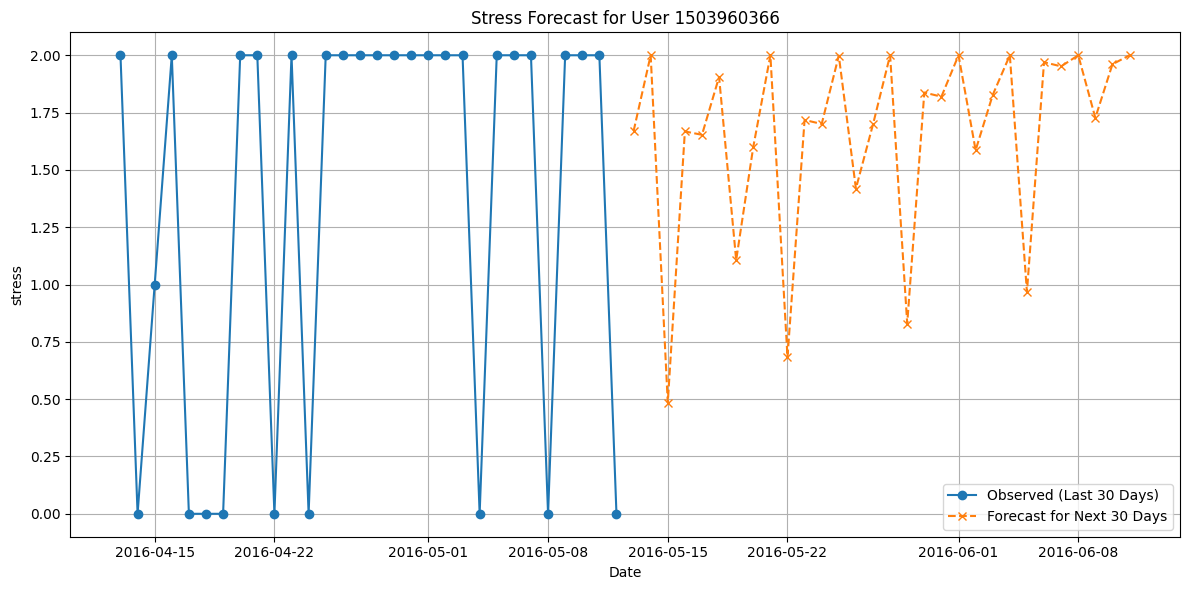

                 Date  Forecast
2016-05-13 2016-05-13  1.668813
2016-05-14 2016-05-14  2.000000
2016-05-15 2016-05-15  0.485401
2016-05-16 2016-05-16  1.667746
2016-05-17 2016-05-17  1.653022
2016-05-18 2016-05-18  1.905188
2016-05-19 2016-05-19  1.106605
2016-05-20 2016-05-20  1.600490
2016-05-21 2016-05-21  2.000000
2016-05-22 2016-05-22  0.683431
2016-05-23 2016-05-23  1.717783
2016-05-24 2016-05-24  1.700291
2016-05-25 2016-05-25  1.998407
2016-05-26 2016-05-26  1.418711
2016-05-27 2016-05-27  1.698534
2016-05-28 2016-05-28  2.000000
2016-05-29 2016-05-29  0.830002
2016-05-30 2016-05-30  1.837391
2016-05-31 2016-05-31  1.819395
2016-06-01 2016-06-01  2.000000
2016-06-02 2016-06-02  1.586066
2016-06-03 2016-06-03  1.826889
2016-06-04 2016-06-04  2.000000
2016-06-05 2016-06-05  0.967198
2016-06-06 2016-06-06  1.969675
2016-06-07 2016-06-07  1.951587
2016-06-08 2016-06-08  2.000000
2016-06-09 2016-06-09  1.727049
2016-06-10 2016-06-10  1.960766
2016-06-11 2016-06-11  2.000000

📈 Forec

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


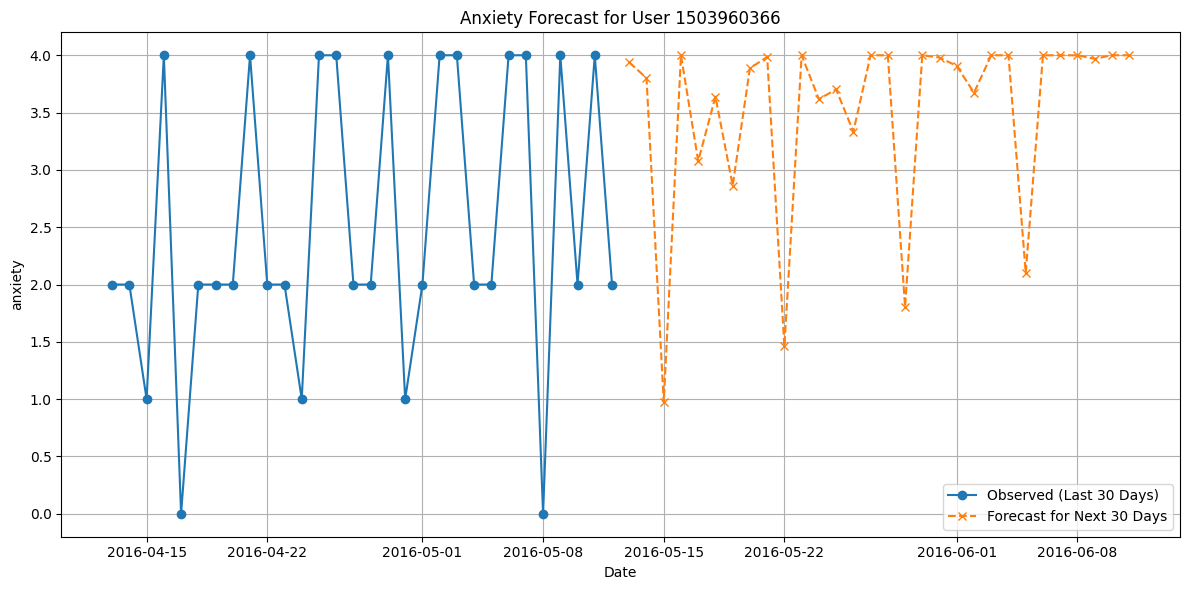

                 Date  Forecast
2016-05-13 2016-05-13  3.938362
2016-05-14 2016-05-14  3.801018
2016-05-15 2016-05-15  0.974028
2016-05-16 2016-05-16  4.000000
2016-05-17 2016-05-17  3.077577
2016-05-18 2016-05-18  3.638887
2016-05-19 2016-05-19  2.863186
2016-05-20 2016-05-20  3.886912
2016-05-21 2016-05-21  3.985152
2016-05-22 2016-05-22  1.460121
2016-05-23 2016-05-23  4.000000
2016-05-24 2016-05-24  3.617222
2016-05-25 2016-05-25  3.702391
2016-05-26 2016-05-26  3.333355
2016-05-27 2016-05-27  4.000000
2016-05-28 2016-05-28  4.000000
2016-05-29 2016-05-29  1.804982
2016-05-30 2016-05-30  4.000000
2016-05-31 2016-05-31  3.979902
2016-06-01 2016-06-01  3.906577
2016-06-02 2016-06-02  3.672909
2016-06-03 2016-06-03  4.000000
2016-06-04 2016-06-04  4.000000
2016-06-05 2016-06-05  2.102824
2016-06-06 2016-06-06  4.000000
2016-06-07 2016-06-07  4.000000
2016-06-08 2016-06-08  4.000000
2016-06-09 2016-06-09  3.968985
2016-06-10 2016-06-10  4.000000
2016-06-11 2016-06-11  4.000000

📈 Forec

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


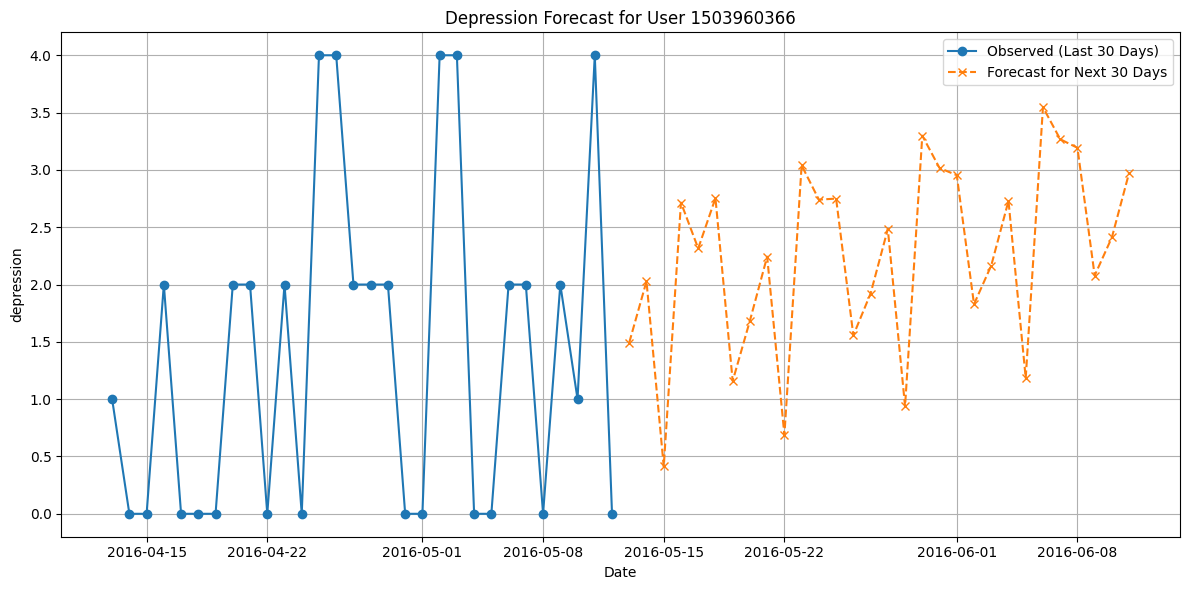

                 Date  Forecast
2016-05-13 2016-05-13  1.493739
2016-05-14 2016-05-14  2.028549
2016-05-15 2016-05-15  0.412672
2016-05-16 2016-05-16  2.714789
2016-05-17 2016-05-17  2.315224
2016-05-18 2016-05-18  2.753610
2016-05-19 2016-05-19  1.157809
2016-05-20 2016-05-20  1.684632
2016-05-21 2016-05-21  2.243417
2016-05-22 2016-05-22  0.687023
2016-05-23 2016-05-23  3.039402
2016-05-24 2016-05-24  2.740426
2016-05-25 2016-05-25  2.749557
2016-05-26 2016-05-26  1.556631
2016-05-27 2016-05-27  1.921427
2016-05-28 2016-05-28  2.484228
2016-05-29 2016-05-29  0.937803
2016-05-30 2016-05-30  3.298604
2016-05-31 2016-05-31  3.016484
2016-06-01 2016-06-01  2.953684
2016-06-02 2016-06-02  1.828268
2016-06-03 2016-06-03  2.165913
2016-06-04 2016-06-04  2.729388
2016-06-05 2016-06-05  1.184632
2016-06-06 2016-06-06  3.546845
2016-06-07 2016-06-07  3.267549
2016-06-08 2016-06-08  3.192696
2016-06-09 2016-06-09  2.078593
2016-06-10 2016-06-10  2.411688
2016-06-11 2016-06-11  2.975275

📈 Forec

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


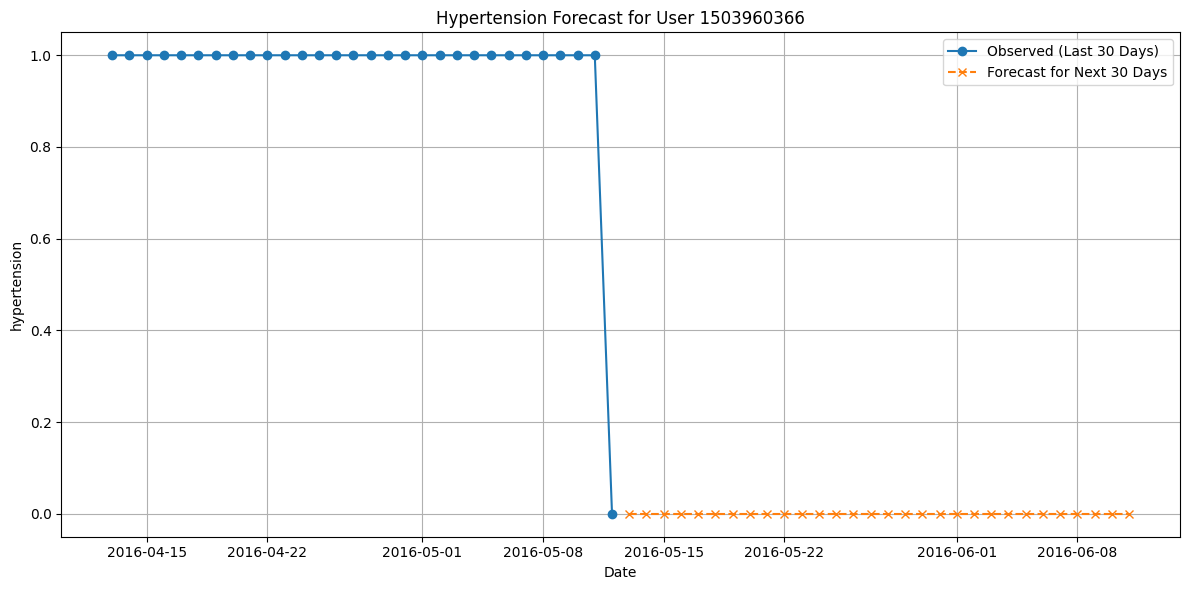

                 Date      Forecast
2016-05-13 2016-05-13  2.207028e-09
2016-05-14 2016-05-14  2.207028e-09
2016-05-15 2016-05-15  2.207028e-09
2016-05-16 2016-05-16  2.207028e-09
2016-05-17 2016-05-17  2.207028e-09
2016-05-18 2016-05-18  6.185663e-10
2016-05-19 2016-05-19  0.000000e+00
2016-05-20 2016-05-20  0.000000e+00
2016-05-21 2016-05-21  0.000000e+00
2016-05-22 2016-05-22  0.000000e+00
2016-05-23 2016-05-23  0.000000e+00
2016-05-24 2016-05-24  0.000000e+00
2016-05-25 2016-05-25  0.000000e+00
2016-05-26 2016-05-26  0.000000e+00
2016-05-27 2016-05-27  0.000000e+00
2016-05-28 2016-05-28  0.000000e+00
2016-05-29 2016-05-29  0.000000e+00
2016-05-30 2016-05-30  0.000000e+00
2016-05-31 2016-05-31  0.000000e+00
2016-06-01 2016-06-01  0.000000e+00
2016-06-02 2016-06-02  0.000000e+00
2016-06-03 2016-06-03  0.000000e+00
2016-06-04 2016-06-04  0.000000e+00
2016-06-05 2016-06-05  0.000000e+00
2016-06-06 2016-06-06  0.000000e+00
2016-06-07 2016-06-07  0.000000e+00
2016-06-08 2016-06-08  0.000

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


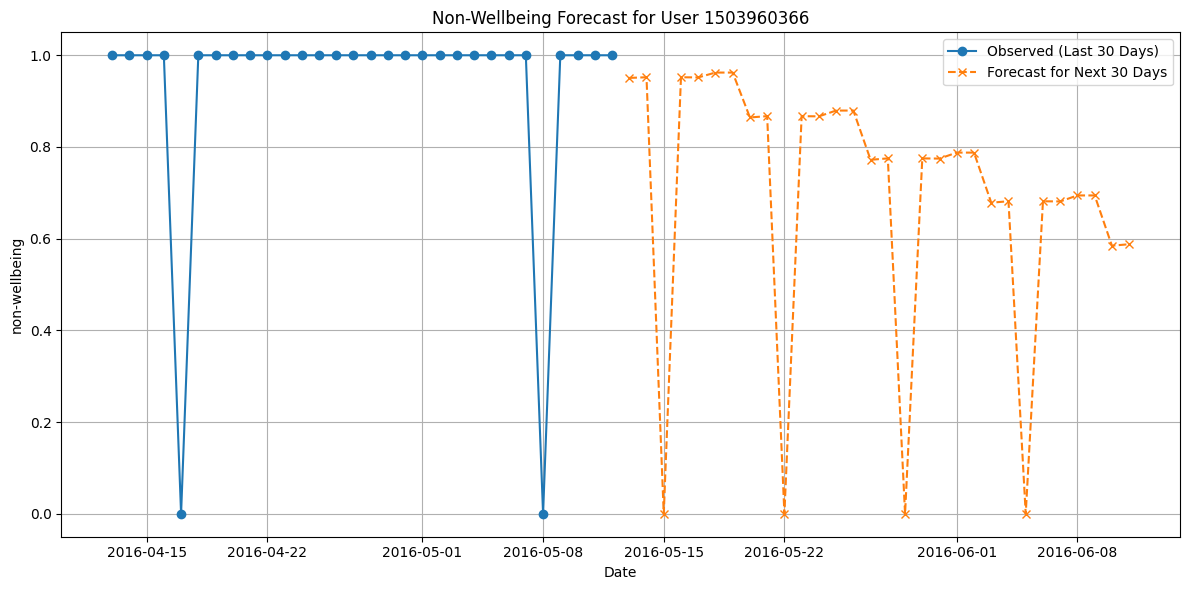

                 Date  Forecast
2016-05-13 2016-05-13  0.950598
2016-05-14 2016-05-14  0.952026
2016-05-15 2016-05-15  0.000000
2016-05-16 2016-05-16  0.951994
2016-05-17 2016-05-17  0.951689
2016-05-18 2016-05-18  0.962257
2016-05-19 2016-05-19  0.962257
2016-05-20 2016-05-20  0.864368
2016-05-21 2016-05-21  0.867197
2016-05-22 2016-05-22  0.000000
2016-05-23 2016-05-23  0.867127
2016-05-24 2016-05-24  0.866762
2016-05-25 2016-05-25  0.879398
2016-05-26 2016-05-26  0.879398
2016-05-27 2016-05-27  0.772022
2016-05-28 2016-05-28  0.775126
2016-05-29 2016-05-29  0.000000
2016-05-30 2016-05-30  0.775049
2016-05-31 2016-05-31  0.774672
2016-06-01 2016-06-01  0.787712
2016-06-02 2016-06-02  0.787712
2016-06-03 2016-06-03  0.678481
2016-06-04 2016-06-04  0.681638
2016-06-05 2016-06-05  0.000000
2016-06-06 2016-06-06  0.681560
2016-06-07 2016-06-07  0.681181
2016-06-08 2016-06-08  0.694300
2016-06-09 2016-06-09  0.694300
2016-06-10 2016-06-10  0.584706
2016-06-11 2016-06-11  0.587873


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pickle
import os

# ----------------------- Configuration -----------------------
valid_ranges = {
    'stress':        (0, 2),
    'anxiety':       (0, 4),
    'depression':    (0, 4),
    'hypertension':  (0, 1),
    'non-wellbeing': (0, 1),
}
forecast_days = 30
seasonal_period = 7  # Weekly seasonality
model_dir = "./sarima_models"
os.makedirs(model_dir, exist_ok=True)

# ----------------------- Forecast Function -----------------------
def sarima_forecast(user_id, target_column, past_data, load_if_exists=True):
    # Sort and index by date
    past_data = past_data.sort_values('Date')
    ts = past_data.set_index('Date')[target_column]
    ts.index = pd.to_datetime(ts.index)

    # Path to save/load model
    model_path = os.path.join(model_dir, f"{user_id}_{target_column}_sarima_model.pkl")

    if load_if_exists and os.path.exists(model_path):
        print(f"🔁 Loading saved model for {target_column}")
        with open(model_path, 'rb') as f:
            model_result = pickle.load(f)
    else:
        print(f"🧠 Training new SARIMAX model for {target_column}")
        model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, seasonal_period))
        model_result = model.fit(disp=False)

        # Save the model
        with open(model_path, 'wb') as f:
            pickle.dump(model_result, f)

    # Forecast
    forecast = model_result.forecast(steps=forecast_days)
    lo, hi = valid_ranges[target_column]
    forecast = np.clip(forecast, lo, hi)

    # Forecast dates
    forecast_dates = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=forecast_days)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(ts.index, ts, label="Observed (Last 30 Days)", marker='o')
    plt.plot(forecast_dates, forecast, label=f"Forecast for Next {forecast_days} Days", linestyle='--', marker='x')
    plt.title(f"{target_column.title()} Forecast for User {user_id}")
    plt.xlabel("Date")
    plt.ylabel(target_column)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return forecast, forecast_dates

# ----------------------- Load Data -----------------------
df = pd.read_csv("/content/cleaned_consistent_dataset.csv")  # Replace with your actual path
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is in datetime format

# ----------------------- Forecast for First User -----------------------
user_id = df['Id'].iloc[0]
past_data = df[df['Id'] == user_id].tail(30)

labels = ['stress', 'anxiety', 'depression', 'hypertension', 'non-wellbeing']

for label in labels:
    print(f"\n📈 Forecasting {label.upper()} for User {user_id}")
    forecast, forecast_dates = sarima_forecast(user_id, label, past_data)
    print(pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast}))



📤 Loading and Forecasting STRESS for User 1503960366
🔁 Loading saved model for stress


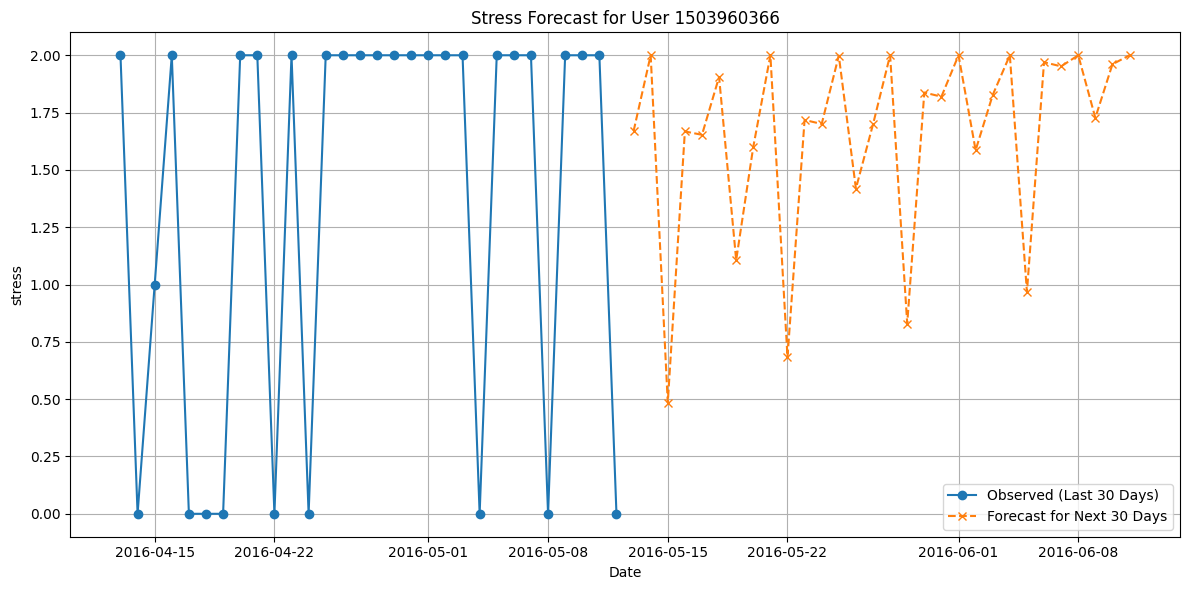

                 Date  Forecast
2016-05-13 2016-05-13  1.668813
2016-05-14 2016-05-14  2.000000
2016-05-15 2016-05-15  0.485401
2016-05-16 2016-05-16  1.667746
2016-05-17 2016-05-17  1.653022
2016-05-18 2016-05-18  1.905188
2016-05-19 2016-05-19  1.106605
2016-05-20 2016-05-20  1.600490
2016-05-21 2016-05-21  2.000000
2016-05-22 2016-05-22  0.683431
2016-05-23 2016-05-23  1.717783
2016-05-24 2016-05-24  1.700291
2016-05-25 2016-05-25  1.998407
2016-05-26 2016-05-26  1.418711
2016-05-27 2016-05-27  1.698534
2016-05-28 2016-05-28  2.000000
2016-05-29 2016-05-29  0.830002
2016-05-30 2016-05-30  1.837391
2016-05-31 2016-05-31  1.819395
2016-06-01 2016-06-01  2.000000
2016-06-02 2016-06-02  1.586066
2016-06-03 2016-06-03  1.826889
2016-06-04 2016-06-04  2.000000
2016-06-05 2016-06-05  0.967198
2016-06-06 2016-06-06  1.969675
2016-06-07 2016-06-07  1.951587
2016-06-08 2016-06-08  2.000000
2016-06-09 2016-06-09  1.727049
2016-06-10 2016-06-10  1.960766
2016-06-11 2016-06-11  2.000000

📤 Loadi

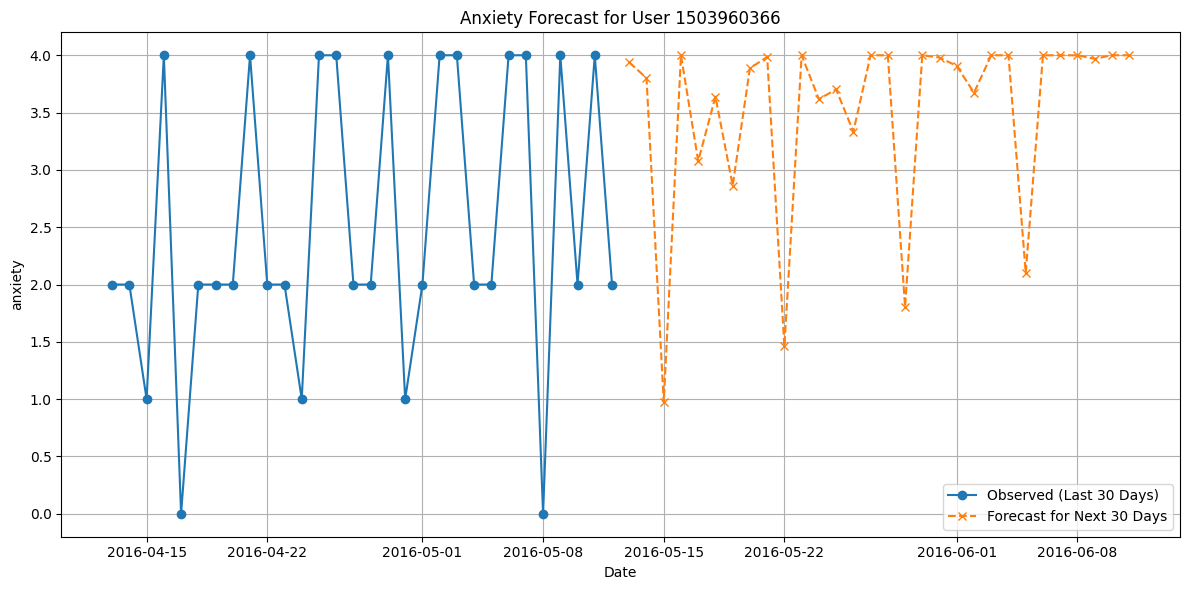

                 Date  Forecast
2016-05-13 2016-05-13  3.938362
2016-05-14 2016-05-14  3.801018
2016-05-15 2016-05-15  0.974028
2016-05-16 2016-05-16  4.000000
2016-05-17 2016-05-17  3.077577
2016-05-18 2016-05-18  3.638887
2016-05-19 2016-05-19  2.863186
2016-05-20 2016-05-20  3.886912
2016-05-21 2016-05-21  3.985152
2016-05-22 2016-05-22  1.460121
2016-05-23 2016-05-23  4.000000
2016-05-24 2016-05-24  3.617222
2016-05-25 2016-05-25  3.702391
2016-05-26 2016-05-26  3.333355
2016-05-27 2016-05-27  4.000000
2016-05-28 2016-05-28  4.000000
2016-05-29 2016-05-29  1.804982
2016-05-30 2016-05-30  4.000000
2016-05-31 2016-05-31  3.979902
2016-06-01 2016-06-01  3.906577
2016-06-02 2016-06-02  3.672909
2016-06-03 2016-06-03  4.000000
2016-06-04 2016-06-04  4.000000
2016-06-05 2016-06-05  2.102824
2016-06-06 2016-06-06  4.000000
2016-06-07 2016-06-07  4.000000
2016-06-08 2016-06-08  4.000000
2016-06-09 2016-06-09  3.968985
2016-06-10 2016-06-10  4.000000
2016-06-11 2016-06-11  4.000000

📤 Loadi

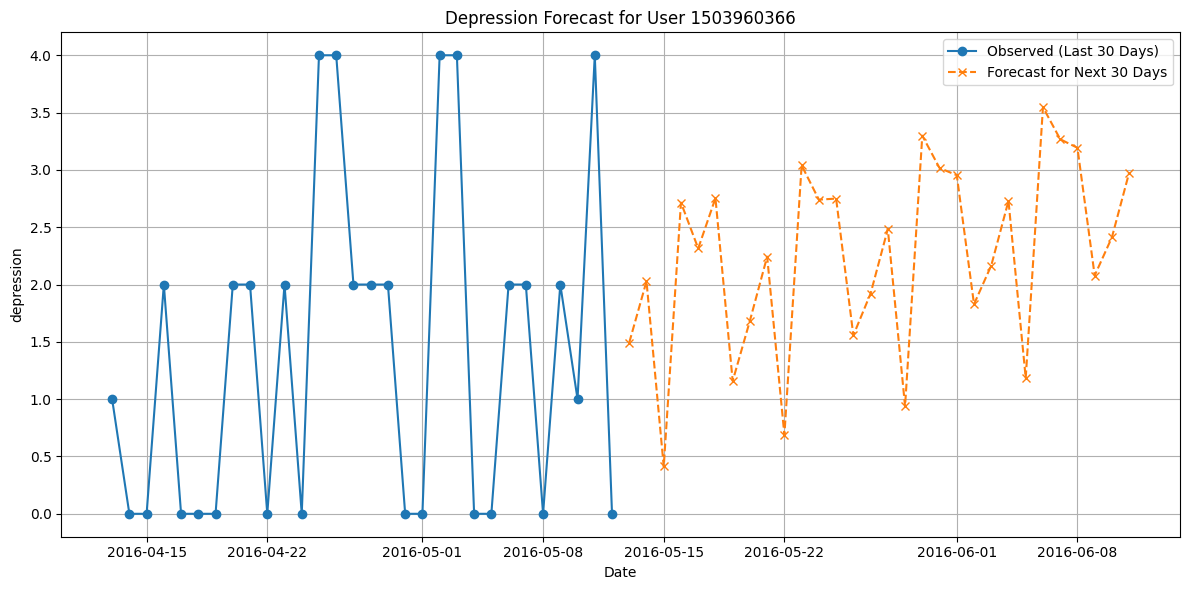

                 Date  Forecast
2016-05-13 2016-05-13  1.493739
2016-05-14 2016-05-14  2.028549
2016-05-15 2016-05-15  0.412672
2016-05-16 2016-05-16  2.714789
2016-05-17 2016-05-17  2.315224
2016-05-18 2016-05-18  2.753610
2016-05-19 2016-05-19  1.157809
2016-05-20 2016-05-20  1.684632
2016-05-21 2016-05-21  2.243417
2016-05-22 2016-05-22  0.687023
2016-05-23 2016-05-23  3.039402
2016-05-24 2016-05-24  2.740426
2016-05-25 2016-05-25  2.749557
2016-05-26 2016-05-26  1.556631
2016-05-27 2016-05-27  1.921427
2016-05-28 2016-05-28  2.484228
2016-05-29 2016-05-29  0.937803
2016-05-30 2016-05-30  3.298604
2016-05-31 2016-05-31  3.016484
2016-06-01 2016-06-01  2.953684
2016-06-02 2016-06-02  1.828268
2016-06-03 2016-06-03  2.165913
2016-06-04 2016-06-04  2.729388
2016-06-05 2016-06-05  1.184632
2016-06-06 2016-06-06  3.546845
2016-06-07 2016-06-07  3.267549
2016-06-08 2016-06-08  3.192696
2016-06-09 2016-06-09  2.078593
2016-06-10 2016-06-10  2.411688
2016-06-11 2016-06-11  2.975275

📤 Loadi

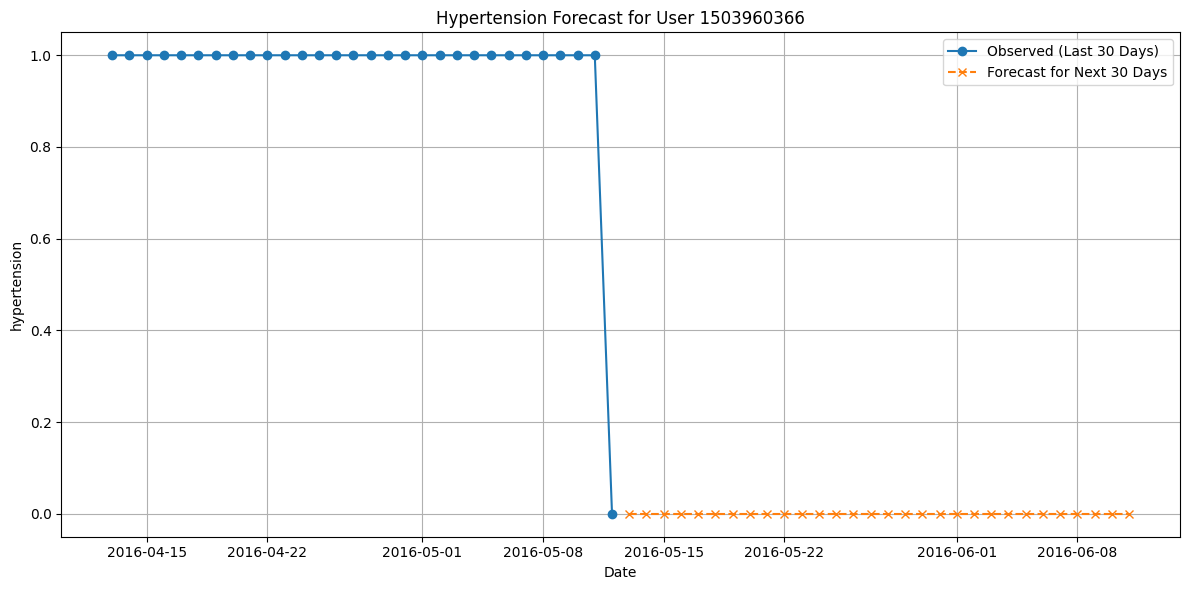

                 Date      Forecast
2016-05-13 2016-05-13  2.207028e-09
2016-05-14 2016-05-14  2.207028e-09
2016-05-15 2016-05-15  2.207028e-09
2016-05-16 2016-05-16  2.207028e-09
2016-05-17 2016-05-17  2.207028e-09
2016-05-18 2016-05-18  6.185663e-10
2016-05-19 2016-05-19  0.000000e+00
2016-05-20 2016-05-20  0.000000e+00
2016-05-21 2016-05-21  0.000000e+00
2016-05-22 2016-05-22  0.000000e+00
2016-05-23 2016-05-23  0.000000e+00
2016-05-24 2016-05-24  0.000000e+00
2016-05-25 2016-05-25  0.000000e+00
2016-05-26 2016-05-26  0.000000e+00
2016-05-27 2016-05-27  0.000000e+00
2016-05-28 2016-05-28  0.000000e+00
2016-05-29 2016-05-29  0.000000e+00
2016-05-30 2016-05-30  0.000000e+00
2016-05-31 2016-05-31  0.000000e+00
2016-06-01 2016-06-01  0.000000e+00
2016-06-02 2016-06-02  0.000000e+00
2016-06-03 2016-06-03  0.000000e+00
2016-06-04 2016-06-04  0.000000e+00
2016-06-05 2016-06-05  0.000000e+00
2016-06-06 2016-06-06  0.000000e+00
2016-06-07 2016-06-07  0.000000e+00
2016-06-08 2016-06-08  0.000

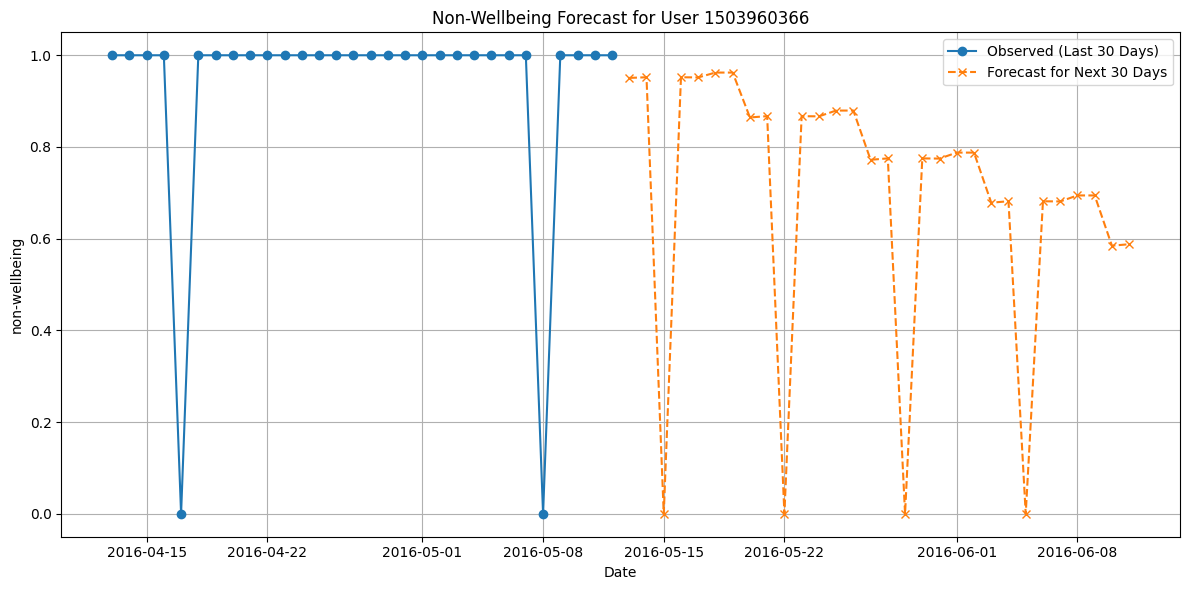

                 Date  Forecast
2016-05-13 2016-05-13  0.950598
2016-05-14 2016-05-14  0.952026
2016-05-15 2016-05-15  0.000000
2016-05-16 2016-05-16  0.951994
2016-05-17 2016-05-17  0.951689
2016-05-18 2016-05-18  0.962257
2016-05-19 2016-05-19  0.962257
2016-05-20 2016-05-20  0.864368
2016-05-21 2016-05-21  0.867197
2016-05-22 2016-05-22  0.000000
2016-05-23 2016-05-23  0.867127
2016-05-24 2016-05-24  0.866762
2016-05-25 2016-05-25  0.879398
2016-05-26 2016-05-26  0.879398
2016-05-27 2016-05-27  0.772022
2016-05-28 2016-05-28  0.775126
2016-05-29 2016-05-29  0.000000
2016-05-30 2016-05-30  0.775049
2016-05-31 2016-05-31  0.774672
2016-06-01 2016-06-01  0.787712
2016-06-02 2016-06-02  0.787712
2016-06-03 2016-06-03  0.678481
2016-06-04 2016-06-04  0.681638
2016-06-05 2016-06-05  0.000000
2016-06-06 2016-06-06  0.681560
2016-06-07 2016-06-07  0.681181
2016-06-08 2016-06-08  0.694300
2016-06-09 2016-06-09  0.694300
2016-06-10 2016-06-10  0.584706
2016-06-11 2016-06-11  0.587873


In [ ]:
# ----------------------- Load Models and Forecast for First User -----------------------
import pandas as pd

# Load data
df = pd.read_csv("/content/cleaned_consistent_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is datetime

# Select first user
user_id = df['Id'].iloc[0]
past_data = df[df['Id'] == user_id].tail(30)

# Labels to forecast
labels = ['stress', 'anxiety', 'depression', 'hypertension', 'non-wellbeing']

# Only load and forecast using saved models
for label in labels:
    print(f"\n📤 Loading and Forecasting {label.upper()} for User {user_id}")
    forecast, forecast_dates = sarima_forecast(user_id, label, past_data, load_if_exists=True)
    print(pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast}))


In [ ]:
#sample data